Problems where each input must be assigned a discrete category (also called label or class) are known as classification problems.
### STEPS
1. Downloading a real-world dataset from Kaggle
2. Exploratory data analysis and visualization
3. Splitting a dataset into training, validation & test sets
4. Filling/imputing missing values in numeric columns
5. Scaling numeric features to a (0,1) range
6. Encoding categorical columns as one-hot vectors
7. Training a logistic regression model using Scikit-learn
8. Evaluating a model using a validation set and test set
9. Saving a model to disk and loading it back

### Steps for Building a Logistic Regression Model

1. **Initialize Weights:**
   - We start by assigning weights for our linear regression model.

2. **Linear Combination:**
   - The model computes the output of a linear combination of inputs.

3. **Sigmoid Activation:**
   - The output is passed through a sigmoid function. 
   - The sigmoid function squashes the output to a value between 0 and 1, representing a probability.

4. **Loss Function:**
   - The loss function used is **cross-entropy**.
   - A good model will have low loss, meaning its predictions are close to the actual outcomes.

5. **Model Evaluation:**
   - We test the model’s predictions against the actual outcomes to assess its performance.
   - The objective is to minimize the loss for an accurate model.



In [ ]:
import numpy as np
import pandas as pd
import matplotlib 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
sns.set_style('darkgrid')
matplotlib.rcParams['font.size']=14
matplotlib.rcParams['figure.figsize']=(10,6)
pd.set_option('display.max_columns', None)

### Loading Our Data And Checking Its Basic Statistics:

In [ ]:
#loading our data
Data_f=pd.read_csv("loan_prediction.csv")
df=Data_f.copy()
df

In [ ]:
df.shape

In [ ]:
df.info()

In [ ]:
df.describe()


In [ ]:
numeric_cols = df.select_dtypes(include=np.number).columns.tolist()
numeric_cols

* We can see how our loan amount terms goes from 1 year minimum to 40  years maximum
  But most terms are around 30 years.
* And have an idea about how much peope applying for loan are earning,we can see our appliacnt incomes are right skewed beacuse less earning people might be applying for more loans
* Our loan amount is as minimum as 9 to maximum 700 showing variety of cases
* Our credit histor percentiles are 1, showing most applicants have positive credit history

In [ ]:
#Filling NULL VALUES:
df.isnull().sum()

### Filling Missing Values
* No null values for loan status so no need to drop any rows
* Replacing null values in Categorical Data(Gender,Married, Dependents and Self_Employed with **mode**)
* Replacing null values in Loan_Amount and Loan Amount Term with **median** since its left_skewed
* Since Credit_History is relatively important, fill with **mode**

In [ ]:
df.columns


In [ ]:
# Fill with median

df['LoanAmount']=df['LoanAmount'].fillna(df['LoanAmount'].median())
df['Loan_Amount_Term']=df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].median())

# Fill with mode (most frequent value)
df["Credit_History"]=df["Credit_History"].fillna(df["Credit_History"].mode()[0])
df['Gender']=df['Gender'].fillna(df['Gender'].mode()[0])
df['Married']=df['Married'].fillna(df['Married'].mode()[0])
df['Self_Employed']=df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])
df['Dependents']=df['Dependents'].fillna(df['Dependents'].mode()[0])

df.isnull().sum()

In [ ]:
df.shape

## Exploratory Data Analysis And Visualization

In [ ]:
df.columns

In [ ]:
plt.subplot(1,2,1)
sns.histplot(x="ApplicantIncome",data=df,edgecolor="black",hue="Gender",multiple="stack")
plt.subplot(1,2,2)
sns.boxplot(x="ApplicantIncome",hue="Gender",data=df)


* We can see how Most appliacnts applying for loan have low income with females earning even less
* Our outliers significantly up the mean making our hraph right skewed

In [ ]:
plt.subplot(1,2,1)
sns.histplot(x="LoanAmount",data=df,edgecolor="black",hue="Education",multiple="stack",palette=["Green","Red"])
plt.subplot(1,2,2)
sns.boxplot(x="LoanAmount",hue="Education",data=df)

* We can see our loan amount is greater for Graduated applicants might be because they are able to pay back more or live a significantly more expensive life
  * We can see many outliers as well but significant no of amount ranges  from 50 to 300.

In [ ]:
plt.subplot(1,2,1)
sns.scatterplot(data=df,x="ApplicantIncome",y="LoanAmount",hue="Education")
plt.subplot(1,2,2)
sns.histplot(data=df,x="Education",color="Pink")

* Its easier to see how being a graduate gets u higher income but at the same time more graduates have applied for loan.

In [ ]:
sns.scatterplot(data=df,x="ApplicantIncome",y="LoanAmount",hue="Property_Area")

* Therers hardly a trend but we can say that AppliacntIncome and LoanAmont have a positive correlation if even its small
* The property Areas do not seem to be effecting the income and amount but semi urban seems to have higher no of income and amount maybe becaus they have the best out of both worlds

* Predicting that income, loan amount ,loan amount term and credit history might be the most important estimators

### Correlation between Loan Status and Loan Amount

In [ ]:
sns.scatterplot(data=df,x="LoanAmount",y="Loan_Status",hue="Credit_History")

* We can see that a positive credit history has a strong effect on our loan status
* While loan Amount doesnt have that a significant effect alone

In [ ]:
sns.scatterplot(data=df,x="LoanAmount",y="Loan_Amount_Term",hue="Loan_Status")

* Applicants requesting smaller loan amounts with standard loan terms (360 months) are more likely to get approval.
* High loan amounts or non-standard loan terms (very short or very long) seem to increase the chances of rejection.
* Loan term and amount are important factors in loan approval decisions.

In [ ]:
df["Gender"]=df["Gender"].map({"Male" :1,"Female":0})
print(df["Gender"].value_counts())


In [ ]:
df["Married"]=df["Married"].map({"Yes":1,"No":0})
print(df["Married"].value_counts())


In [ ]:
df["Self_Employed"]=df["Self_Employed"].map({"Yes":1,"No":0})
print(df["Self_Employed"].value_counts())


In [ ]:
df["Dependents"]=df["Dependents"].map({"0":0,"1":1,"2":2,"3+":3})
print(df["Dependents"].value_counts())


In [ ]:
df["Loan_Status"]=df["Loan_Status"].map({"Y" :1,"N":0})

df["Education"]=df["Education"].map({"Graduate":1,"Not Graduate":0})
print(df["Loan_Status"].value_counts())

print(df["Education"].value_counts())


In [ ]:
numeric_df = df.select_dtypes(include=['number'])
sns.heatmap(data=numeric_df.corr(),annot=True,cmap="Reds")
#WE can see credit history has highest coorelation

In [ ]:
df

In [ ]:
from sklearn import preprocessing
enc=preprocessing.OneHotEncoder() #our class
enc.fit(df[['Property_Area']])#fitting using one x
enc.categories_

In [ ]:
one_hot = enc.transform(df[['Property_Area']]).toarray()
one_hot

In [ ]:
df[['Rural', 'Semiurban', 'Urban']]=one_hot 
df.columns

## Splliting our Data
### Training,Validation And Test Sets

In [ ]:
#our test data has been provided with the dataset:
test_df=pd.read_csv("loan_test.csv")
test_df.isnull().sum()

In [ ]:
test_df=test_df.dropna()
test_df["Married"] = test_df["Married"].map({"Yes": 1, "No": 0})
test_df["Self_Employed"] = test_df["Self_Employed"].map({"Yes": 1, "No": 0})
test_df["Dependents"] = test_df["Dependents"].map({"0": 0, "1": 1, "2": 2, "3+": 3})
test_df["Gender"]=test_df["Gender"].map({"Male":1,"Female":0})

test_df["Education"]=test_df["Education"].map({"Graduate":1,"Not Graduate":0})

In [ ]:
enc.fit(test_df[['Property_Area']])#fitting using one x
enc.categories_
one_hot = enc.transform(test_df[['Property_Area']]).toarray()
one_hot
test_df[['Rural', 'Semiurban', 'Urban']]=one_hot 
test_df.columns

In [ ]:
test_df

test_df.isnull().sum()

In [ ]:
train_df, val_df = train_test_split(df, test_size=0.25, random_state=42)
print('train_df.shape :', train_df.shape)
print('val_df.shape :', val_df.shape)
print('test_df.shape :', test_df.shape)


### Identifying Input and Target Columns

In [ ]:

input_cols=[ 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 
       'Rural', 'Semiurban', 'Urban'] # not including id and target
target_col="Loan_Status"
print(input_cols)
print(target_col)
train_inputs = train_df[input_cols].copy()
train_targets = train_df[target_col].copy()
val_inputs = val_df[input_cols].copy()
val_targets = val_df[target_col].copy()
test_inputs = test_df[input_cols].copy()


In [ ]:
train_targets

In [ ]:
train_inputs

### Scaling Numeric Features

In [ ]:
##Scaling Numeric Features:
numeric_cols=['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term']
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

scaler.fit(df[numeric_cols])


In [ ]:
print('Minimum:')
list(scaler.data_min_)

In [ ]:
print('Maximum:')
list(scaler.data_max_)

In [ ]:
train_inputs[numeric_cols] = scaler.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = scaler.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = scaler.transform(test_inputs[numeric_cols])

In [ ]:
train_inputs[numeric_cols].describe()

In [ ]:
print('train_inputs:', train_inputs.shape)
print('train_targets:', train_targets.shape)
print('val_inputs:', val_inputs.shape)
print('val_targets:', val_targets.shape)
print('test_inputs:', test_inputs.shape)


## Logistic Regression
Logistic regression is a commonly used technique for solving binary classification problems. In a logistic regression model:

* we take linear combination (or weighted sum of the input features)
* we apply the sigmoid function to the result to obtain a number between 0 and 1
* this number represents the probability of the input being classified as "Yes"
* the cross entropy loss function is used to evaluate the results

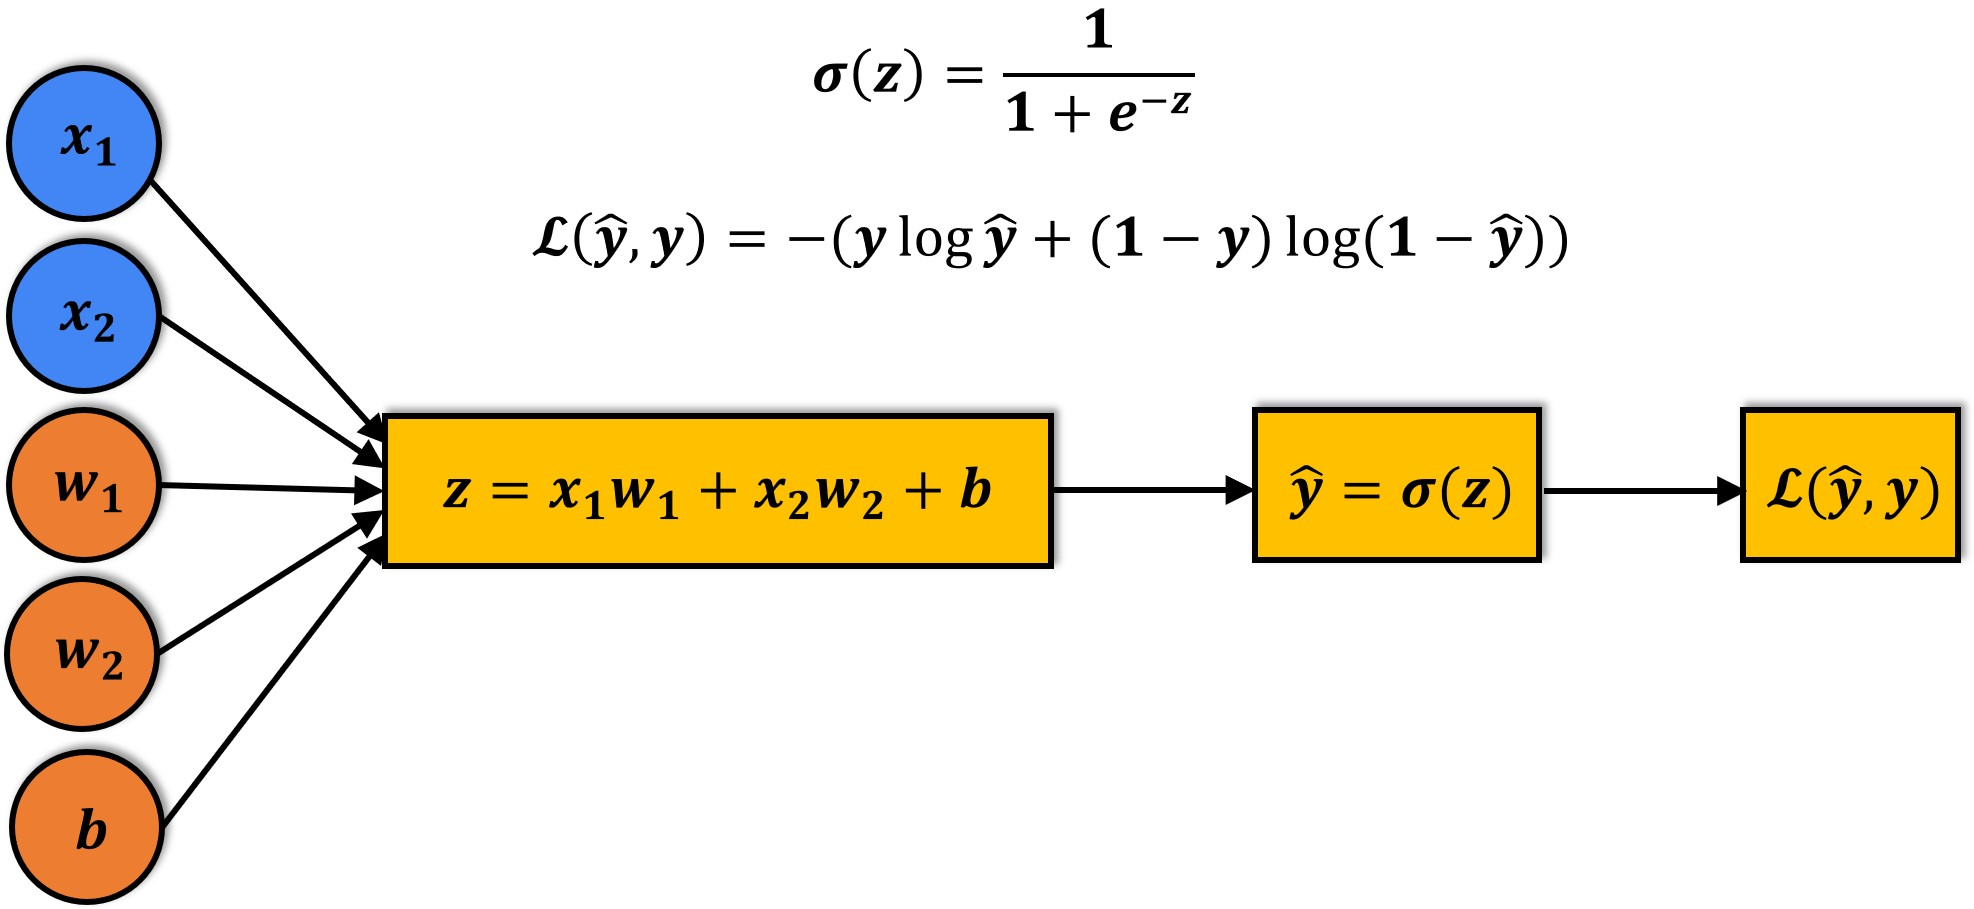

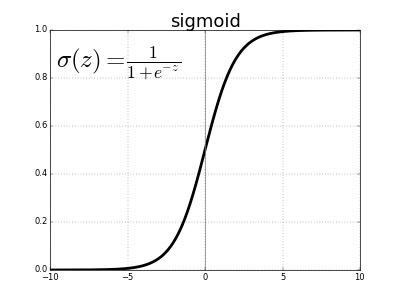


In [ ]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(solver='liblinear')

In [ ]:
%%time
model.fit(train_inputs[input_cols],train_targets) 

* We initialize a model with random parameters (weights & biases).
* We pass some inputs into the model to obtain predictions.
* We compare the model's predictions with the actual targets using the loss function.
* We use an optimization technique (like least squares, gradient descent etc.) to reduce the loss by adjusting the weights & biases of the model
* We repeat steps 1 to 4 till the predictions from the model are good enough.

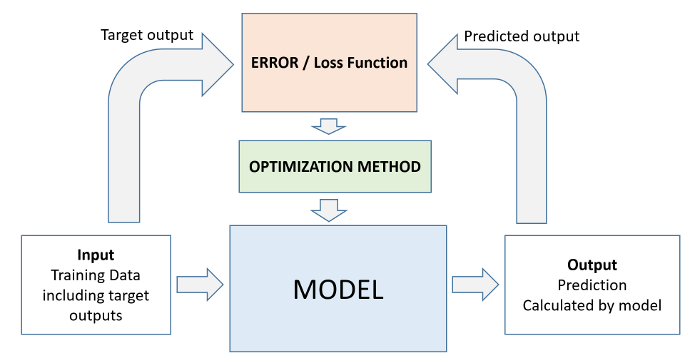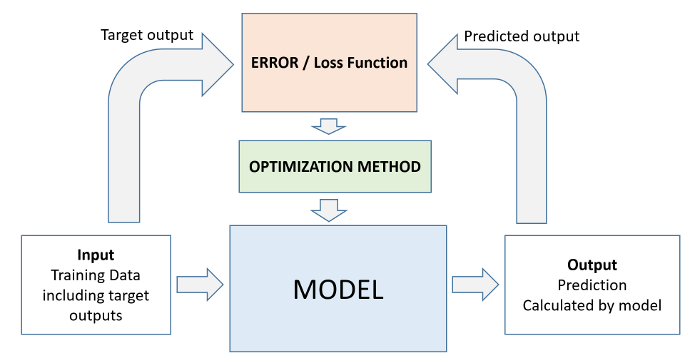

In [ ]:
print(input_cols)
print(train_targets)

In [ ]:
print(model.coef_.tolist())
#we can see credit history has weight of 3.19, 

In [ ]:
n=len(model.coef_.tolist())
weight_df=pd.DataFrame({
    'feature' :(input_cols),
    'weight':model.coef_.tolist()[0]})
weight_df

In [ ]:

sns.barplot(data=weight_df,x='weight',y='feature')

In [ ]:
print(model.intercept_)


Each weight is applied to the value in a specific column of the input. Higher the weight, greater the impact of the column on the prediction.

## Making Predictions and Evaluating the Model


In [ ]:
X_train = train_inputs[input_cols]
X_val = val_inputs[input_cols]
X_test = test_inputs[input_cols]

In [ ]:
train_preds = model.predict(X_train)


In [ ]:
train_preds

In [ ]:
train_targets

In [ ]:
train_probs = model.predict_proba(X_train)
train_probs

* We can test the accuracy of the model's predictions by computing the percentage of matching values in train_preds and train_targets.

* This can be done using the accuracy_score function from sklearn.metrics.

In [ ]:
from sklearn.metrics import accuracy_score


In [ ]:
accuracy_score(train_targets, train_preds)


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(train_targets, train_preds, normalize='true')

In [ ]:
def predict_and_plot(inputs, targets, name=''):
    preds = model.predict(inputs)
    
    accuracy = accuracy_score(targets, preds)
    print("Accuracy: {:.2f}%".format(accuracy * 100))
    
    cf = confusion_matrix(targets, preds, normalize='true')
    plt.figure()
    sns.heatmap(cf, annot=True)
    plt.xlabel('Prediction')
    plt.ylabel('Target')
    plt.title('{} Confusion Matrix'.format(name));
    
    return preds

train_preds = predict_and_plot(X_train, train_targets, 'Training')

In [ ]:
val_preds = predict_and_plot(X_val, val_targets, 'Validatiaon')


In [ ]:
##using our test data now::
prediction = model.predict(X_test)
prediction

In [ ]:
test_df["Loan_Status"]=prediction

In [ ]:
test_df